In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df["Sex"])
df['Embarked']=lb.fit_transform(df["Embarked"])

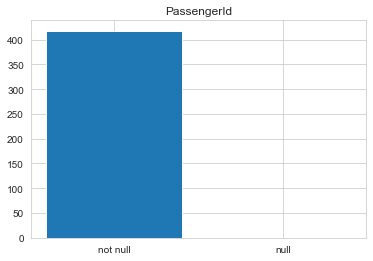

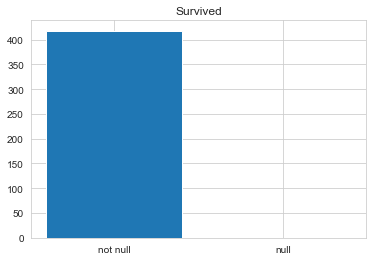

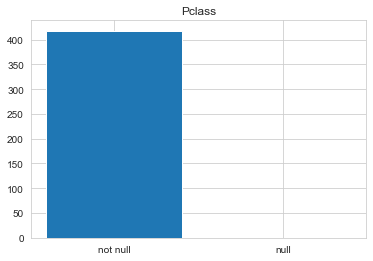

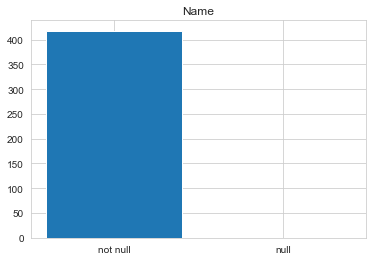

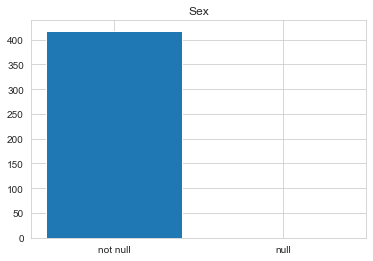

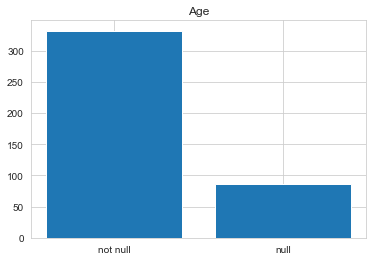

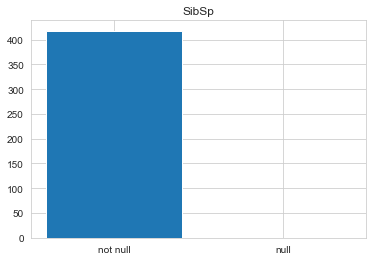

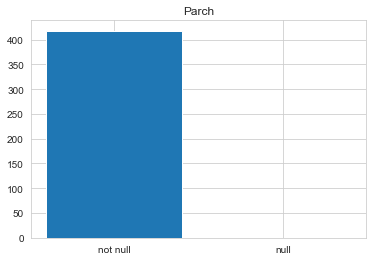

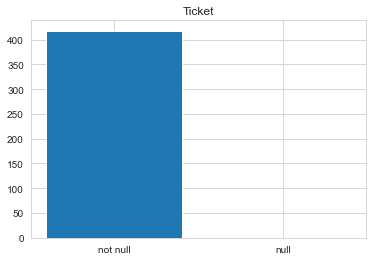

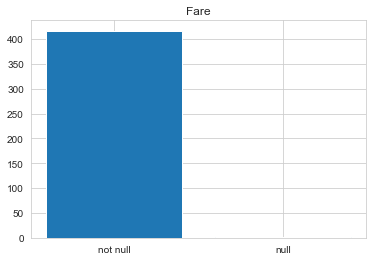

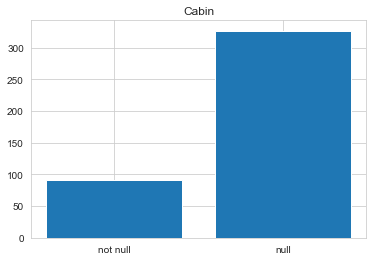

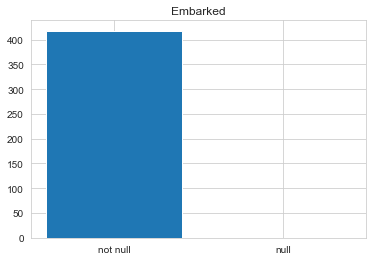

In [5]:
for feature in df.columns:
    fig, ax = plt.subplots()
    ax.bar(['not null', 'null'],[sum(df[feature].notnull()), sum(df[feature].isnull())])
    ax.set_title(feature)

In [6]:
df = df.drop(['Name','Cabin','PassengerId','Ticket'], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [8]:
categorical_features = ['Sex','Pclass','SibSp','Parch']

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


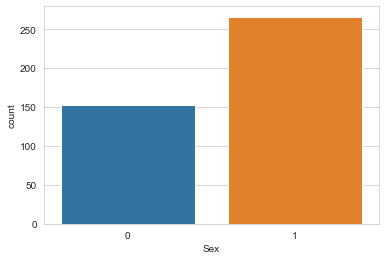

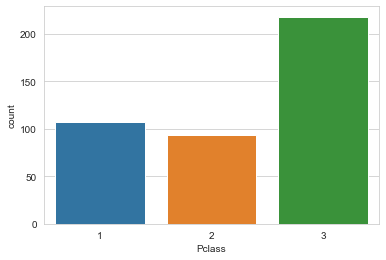

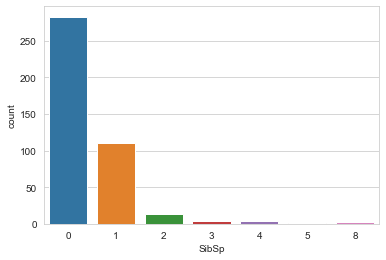

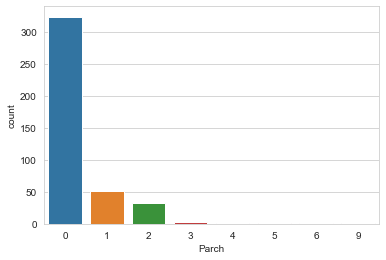

In [9]:
for feature in categorical_features:
    fig, ax = plt.subplots()
    sns.countplot(df[feature],ax = ax)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Age', ylabel='Density'>

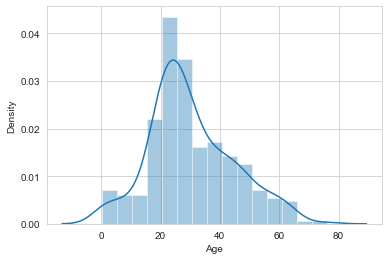

In [10]:
sns.distplot(df.Age)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Fare', ylabel='Density'>

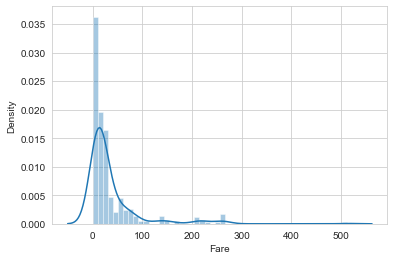

In [11]:
sns.distplot(df.Fare)

<AxesSubplot:>

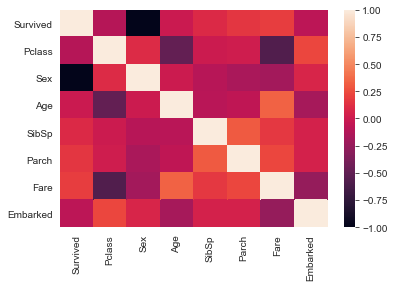

In [12]:
sns.heatmap(df.corr())

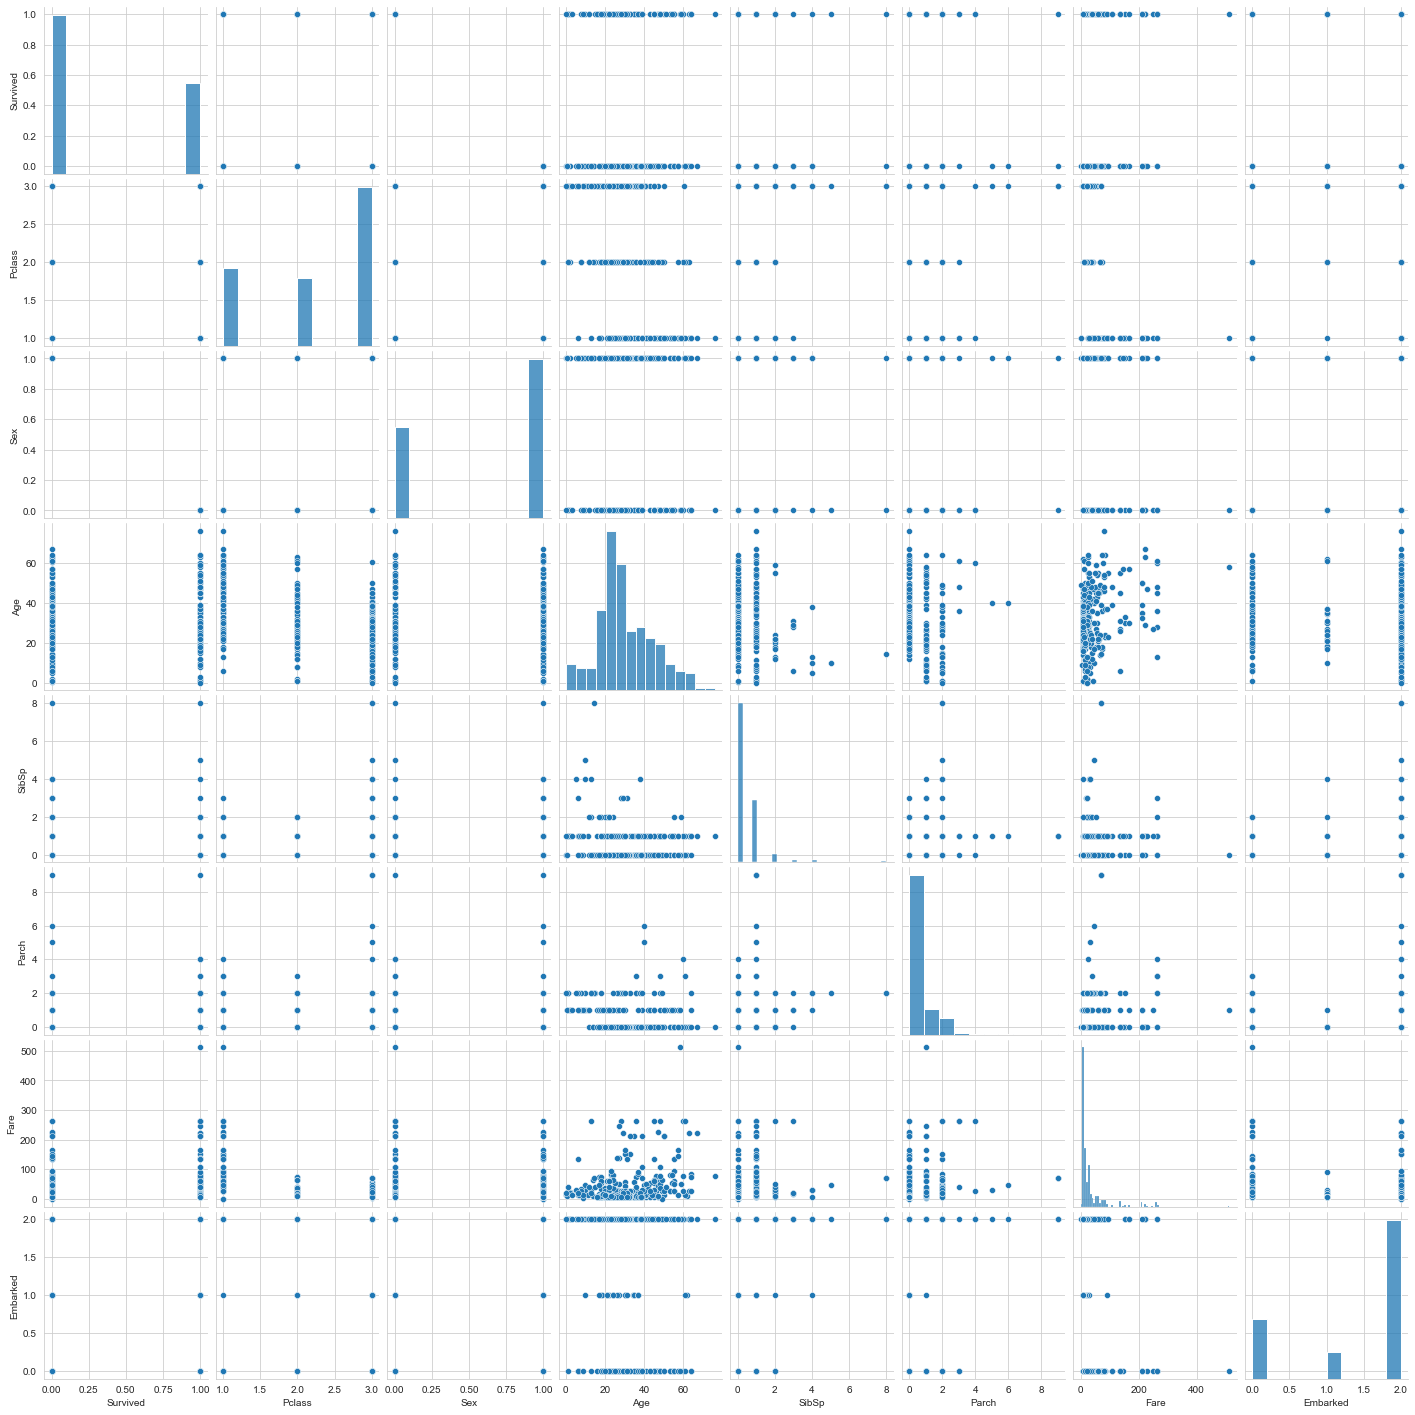

In [13]:
sns.pairplot(df)

In [14]:
nans = df.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([nans], axis=1, keys=["Total"])
missing_data

,Total
Age,86
Fare,1
Embarked,0
Parch,0
SibSp,0
Sex,0
Pclass,0
Survived,0


In [15]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [16]:
nans = df.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([nans], axis=1, keys=["Total"])
missing_data

,Total
Embarked,0
Fare,0
Parch,0
SibSp,0
Age,0
Sex,0
Pclass,0
Survived,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis = 1), df.Survived)
forest = RandomForestClassifier(n_estimators=5, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=1)

In [18]:
forest.score(X_train, y_train)

1.0

In [19]:
forest.score(X_test, y_test)

1.0

<BarContainer object of 7 artists>

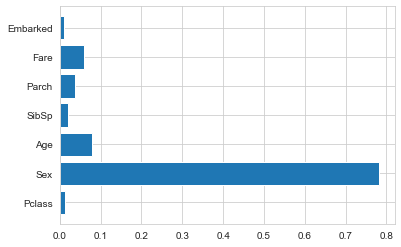

In [20]:
plt.barh(X_train.columns, forest.feature_importances_)

In [21]:
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_test)

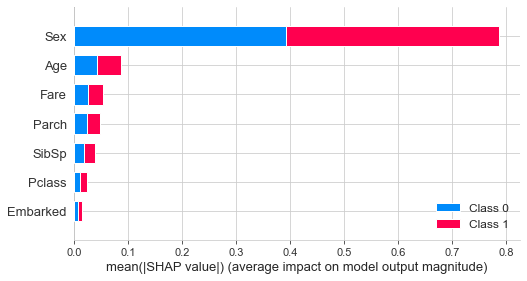

In [22]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10,random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [24]:
tree.score(X_train,y_train)

1.0

In [25]:
tree.score(X_test,y_test)

1.0

<BarContainer object of 7 artists>

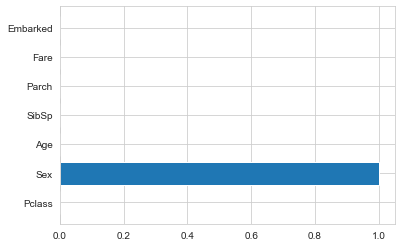

In [26]:
plt.barh(X_train.columns, tree.feature_importances_)

In [27]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
169,3,0,22.0,0,0,8.9625,2
335,1,1,30.0,0,0,26.0000,2
51,2,1,27.0,0,0,15.0333,0
96,1,0,76.0,1,0,78.8500,2
310,3,1,18.0,0,0,8.6625,2
...,...,...,...,...,...,...,...
260,3,1,36.5,1,0,17.4000,2
203,2,0,8.0,1,1,26.0000,2
316,1,1,57.0,1,0,146.5208,0
67,1,1,47.0,0,0,42.4000,2


In [28]:
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_test)

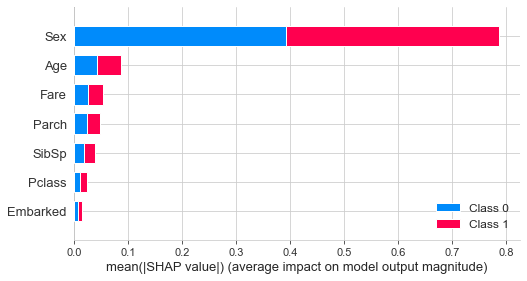

In [29]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [30]:
df.iloc[1]

Survived     1.0
Pclass       3.0
Sex          0.0
Age         47.0
SibSp        1.0
Parch        0.0
Fare         7.0
Embarked     2.0
Name: 1, dtype: float64

In [31]:
import dalex as dx

In [32]:
titanic_forest_explainer = dx.Explainer(forest, X_train, y_train, label = 'Titanic RF pipeline')

Preparation of a new explainer is initiated

  -> data              : 313 rows 7 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 313 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Titanic RF pipeline
  -> predict function  : <function yhat_proba_default at 0x7fa9ad5b3430> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.351, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.2, mean = 0.00639, max = 0.2
  -> model_info        : package sklearn

A new explainer has been created!


In [40]:
bd_1 = titanic_forest_explainer.predict_parts(X_train.iloc[[1]], type = 'shap')
bd_2 = titanic_forest_explainer.predict_parts(X_train.iloc[[2]], type = 'shap')
bd_100 = titanic_forest_explainer.predict_parts(X_train.iloc[[100]], type = 'break_down')

In [41]:
bd_1.result

,variable,contribution,variable_name,variable_value,sign,label,B
0,Pclass = 1.0,-0.007668,Pclass,1.0,-1.0,Titanic RF pipeline,1
1,Fare = 26.0,0.012780,Fare,26.0,1.0,Titanic RF pipeline,1
2,Parch = 0.0,-0.007029,Parch,0.0,-1.0,Titanic RF pipeline,1
3,Sex = 1.0,-0.276038,Sex,1.0,-1.0,Titanic RF pipeline,1
4,Embarked = 2.0,0.004473,Embarked,2.0,1.0,Titanic RF pipeline,1
...,...,...,...,...,...,...,...
2,Parch = 0.0,-0.017304,Parch,0.0,-1.0,Titanic RF pipeline,0
3,Pclass = 1.0,-0.004856,Pclass,1.0,-1.0,Titanic RF pipeline,0
4,Embarked = 2.0,-0.003323,Embarked,2.0,-1.0,Titanic RF pipeline,0
5,SibSp = 0.0,-0.001917,SibSp,0.0,-1.0,Titanic RF pipeline,0


In [42]:
bd_1.plot()

In [43]:
bd_2.plot()

In [44]:
bd_100.plot()

In [38]:
forest.predict(X_train.iloc[[1]])

array([0])

In [39]:
df.loc[[1]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,3,0,47.0,1,0,7.0,2
